**Softmax Regression** là một trong những thuật toán supervised-learning Machine Learning nền tảng quan trọng nhất, được sử dụng để giải quyết bài toán Phân loại đa lớp (Multiclass Classification). Với việc sử dụng hàm Softmax, thuật toán Softmax Regression trả về kết quả đầu ra là phân bố xác suất trên các phân lớp của đề bài. Từ đó, ta có thể sử dụng các ước lượng xác suất này để thực hiện dự đoán một cách linh hoạt.

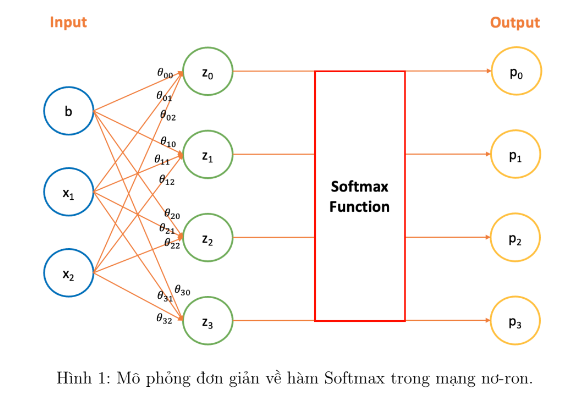

## Import libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Đọc dữ liệu:
Sử dụng thư viện pandas để đọc file .csv thành DataFrame

In [ ]:
dataset_path = 'creditcard.csv'
df = pd.read_csv(dataset_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Tách biến X, y:
Chuyển đổi DataFrame hiện tại thành array và tách hai biến X, y:

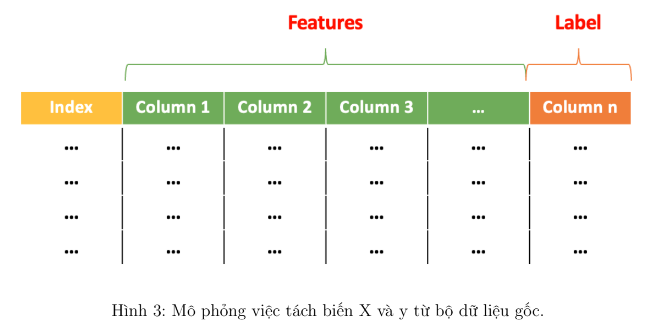

In [ ]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:,:-1].astype(np.float64),dataset_arr[:,-1].astype(np.uint8)

<ipython-input-5-f5273b4c1a5a>:2: RuntimeWarning: invalid value encountered in cast
  X, y = dataset_arr[:,:-1].astype(np.float64),dataset_arr[:,-1].astype(np.uint8)


## Thêm bias vào X:
Khi sử dụng thư viện, bias sẽ được thêm tự động vào X. Tuy nhiên, khi triển khai lại từ đầu, chúng ta cần phải tự thêm bias vào mỗi mẫu dữ liệu, nhằm thỏa mãn công thức hàm dự đoán:

In [ ]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept,X), axis=1)

## One-hot encoding label:
Đối với Softmax Regression, sau khi có biến chứa nhãn dữ liệu y, ta cần phải thay đổi cách biểu diễn giá trị của nhãn trước khi thực hiện tính toán. Cụ thể (giả định với bộ dữ liệu có 2 class), với dạng biểu diễn số nguyên ban đầu y = [0, 0, 1,...1], ta biến đổi thành các vector toàn giá trị 0 với số phần tử
bằng n_classes và gán bằng 1 tại vị trí chỉ mục theo giá trị tại nhãn ban đầu của mẫu dữ liệu tương ứng. Lúc này, ta sẽ được y_one_hot = [[1, 0], [1, 0], [0, 1],...[0, 1]].

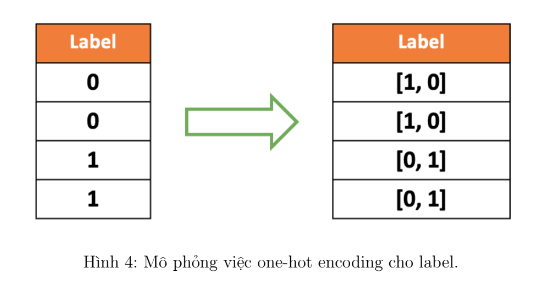

In [ ]:
n_classes = np.unique(y, axis =0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

## Chia tập train, val, test:
Sau khi đã hoàn chỉnh biến X, chúng ta tiến hành chia ba bộ train, val, test với tỉ lệ 7:2:1

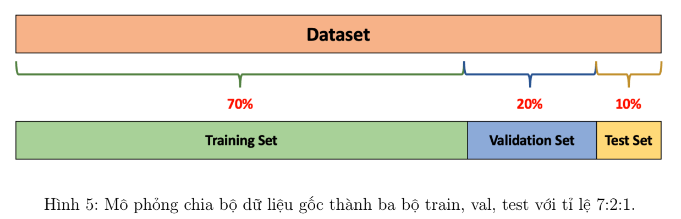

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded,
                                                  test_size=val_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size = test_size,
                                                    random_state = random_state,
                                                    shuffle = is_shuffle)

In [ ]:
y_val

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Chuẩn hóa dữ liệu:
Ta sử dụng X_train vừa tạo ở bước trên fit vào hàm chuẩn hóa StandardScaler. Sau đó, đem scaler này chuẩn hóa cho tập X_val và X_test (lưu ý rằng ta không chuẩn hóa bias nên sẽ bỏ qua cột đầu tiên trong X):

In [ ]:
normalizer = StandardScaler ()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform (X_test[:,1:])

In [ ]:
X_val

array([[ 1.        ,  0.75788869, -0.1872928 , ...,  0.77232933,
         0.39297783, -0.36050017],
       [ 1.        ,  0.53020295,  0.80018691, ...,  0.27759959,
         0.08465087, -0.27928376],
       [ 1.        ,  1.46290351,  0.8285516 , ..., -0.02537865,
         0.05309721, -0.35701449],
       ...,
       [ 1.        ,  0.92781166,  0.68889949, ...,  0.08892126,
         0.11481063, -0.03939133],
       [ 1.        , -1.92363923, -1.32435673, ...,  2.02054805,
        -0.4963789 ,  1.5655719 ],
       [ 1.        ,  0.91407439, -0.08491275, ...,  0.27427918,
         0.51345786, -0.28060058]])

## Cài đặt các hàm quan trọng:
Để thuận tiện trong việc cài đặt chương trình, ta định nghĩa sẵn một số hàm sẽ được dùng trong quá trình huấn luyện mô hình:

– **Hàm softmax**: Xây dựng hàm softmax với công thức như sau:

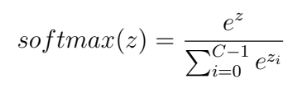

Trong đó: C là số class, và phép tổng dưới mẫu được tính riêng cho từng mẫu
dữ liệu trong một batch.

In [ ]:
def softmax(z):
  exp_z = np.exp(z)
  if z.ndim == 1:
    return exp_z / exp_z.sum() # Sum over the single axis (axis 0)
  else:
    return exp_z / exp_z.sum(axis=1)[:, None]

In [ ]:
Z = np.array([-1, -2, 3, 2])
softmax(Z)

array([0.01314897, 0.00483724, 0.71790961, 0.26410418])

– **Hàm dự đoán**:

In [ ]:
def predict(X, theta):
  z = np.dot(X, theta)
  y_hat = softmax(z)
  return y_hat

– **Hàm tính loss**: Xây dựng hàm tính loss với công thức Cross-entropy như sau:

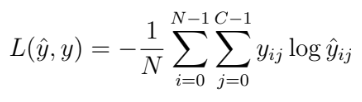

In [ ]:
def compute_loss(y_hat, y):
  n = y.size
  print(n)

  return round((-1 / n) * np.sum(y * np.log(y_hat)), 8)

In [ ]:
y_hat = np.array([0.4,0.15, 0.05, 0.4])
y = np.array([1, 0, 0, 0])
compute_loss(y_hat, y)

4


0.22907268

In [ ]:
np.log(0.4)

-0.916290731874155

– **Hàm tính gradient**: Xây dựng hàm tính gradient với công thức như sau:

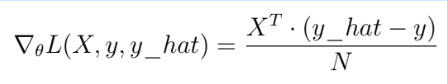

In [ ]:
def compute_gradient(X, y, y_hat):
  n = y.size

  return np.dot(X.T, (y_hat - y)) / n

– **Hàm cập nhật trọng số**: Khi áp dụng giải thuật Gradient Descent, trọng số θ
sẽ được cập nhật bằng công thức như sau:

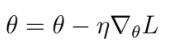

Trong đó: η là learning rate.

In [ ]:
def update_theta(theta, gradient, lr):
  return theta - lr * gradient

– **Hàm tính độ chính xác**: Xây dựng hàm tính độ chính xác với công thức như
sau:

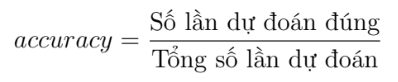

Ở bản cài đặt cho Softmax Regression, vì kết quả dự đoán là một vector phân bố
xác suất, ta sẽ sử dụng hàm **argmax** để đưa dự đoán về class ID có ước lượng xác
suất cao nhất.

In [ ]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
  return acc

In [ ]:
y_hat = (0; 1; 3; 2; 0; 2; 1; 2)
y = (0; 0; 3; 2; 1; 2; 2; 1)
acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
print(acc)

## Khai báo các siêu tham số và khởi tạo weights:

với Softmax Regression, mỗi class sẽ có một bộ trọng số riêng ứng với các
đặc trưng đầu vào (bao gồm cả bias). Vì vậy, ta cần khởi tạo trọng số θ với shape=(n_features, n_classes).

In [ ]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

## Huấn luyện mô hình:
Chúng ta sẽ triển khai quá trình huấn luyện mô hình sử dụng thuật toán Gradient Descent, với ý tưởng chính như sau: Khởi tạo vòng lặp với số lần lặp bằng số epochs. Với mỗi lần lặp, duyệt qua toàn bộ mẫu dữ liệu (trong training set) theo từng bộ mẫu dữ liệu có kích thước batch_size (tạm gọi là cặp X_i và
y_i) và thực hiện các bước tính toán sau:

* (a) Tính y_hat sử dụng hàm predict(X_i, theta). Đây là kết quả dự đoán của
mô hình với các mẫu dữ liệu tại batch đang xét.
* (b) Tính loss sử dụng hàm compute_loss(y_hat, y_i). Lưu trữ giá trị này vào
một list batch_losses, dùng cho việc trực quan hóa kết quả huấn luyện sau này.
* (c) Tính gradient sử dụng hàm compute_gradient(X_i, y_i, y_hat).
* (d) Sử dụng kết quả gradient vừa tìm được để cập nhật bộ trọng số theta sử dụng hàm update_theta(theta, gradient, lr).

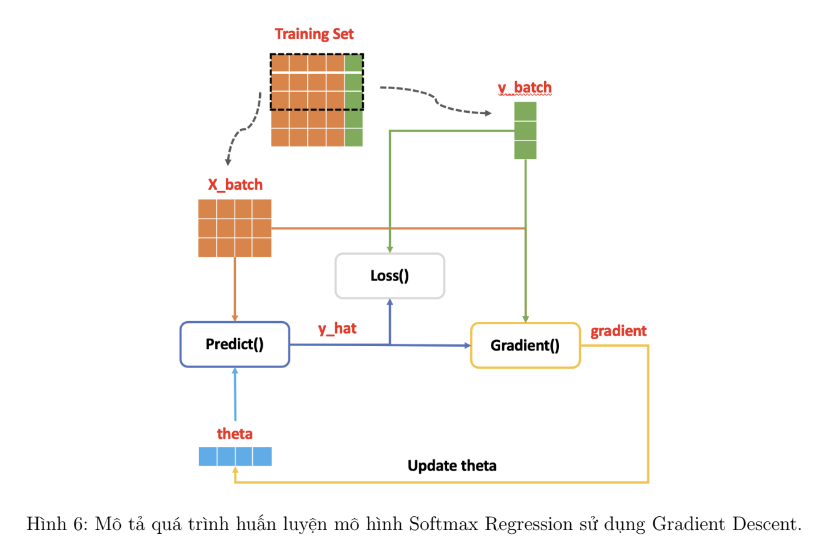

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)


        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH {epoch + 1}:\tTraining loss : {train_batch_loss:.3f} \tValidation loss : {val_batch_loss:.3f}')


EPOCH 1:	Training loss : 0.355 	Validation loss : nan

EPOCH 2:	Training loss : 0.282 	Validation loss : nan

EPOCH 3:	Training loss : 0.227 	Validation loss : nan

EPOCH 4:	Training loss : 0.186 	Validation loss : nan

EPOCH 5:	Training loss : 0.155 	Validation loss : nan

EPOCH 6:	Training loss : 0.131 	Validation loss : nan

EPOCH 7:	Training loss : 0.113 	Validation loss : nan

EPOCH 8:	Training loss : 0.098 	Validation loss : nan

EPOCH 9:	Training loss : 0.086 	Validation loss : nan

EPOCH 10:	Training loss : 0.077 	Validation loss : nan

EPOCH 11:	Training loss : 0.069 	Validation loss : nan

EPOCH 12:	Training loss : 0.063 	Validation loss : nan

EPOCH 13:	Training loss : 0.057 	Validation loss : nan

EPOCH 14:	Training loss : 0.052 	Validation loss : nan

EPOCH 15:	Training loss : 0.048 	Validation loss : nan

EPOCH 16:	Training loss : 0.045 	Validation loss : nan

EPOCH 17:	Training loss : 0.042 	Validation loss : nan

EPOCH 18:	Training loss : 0.039 	Validation loss : nan



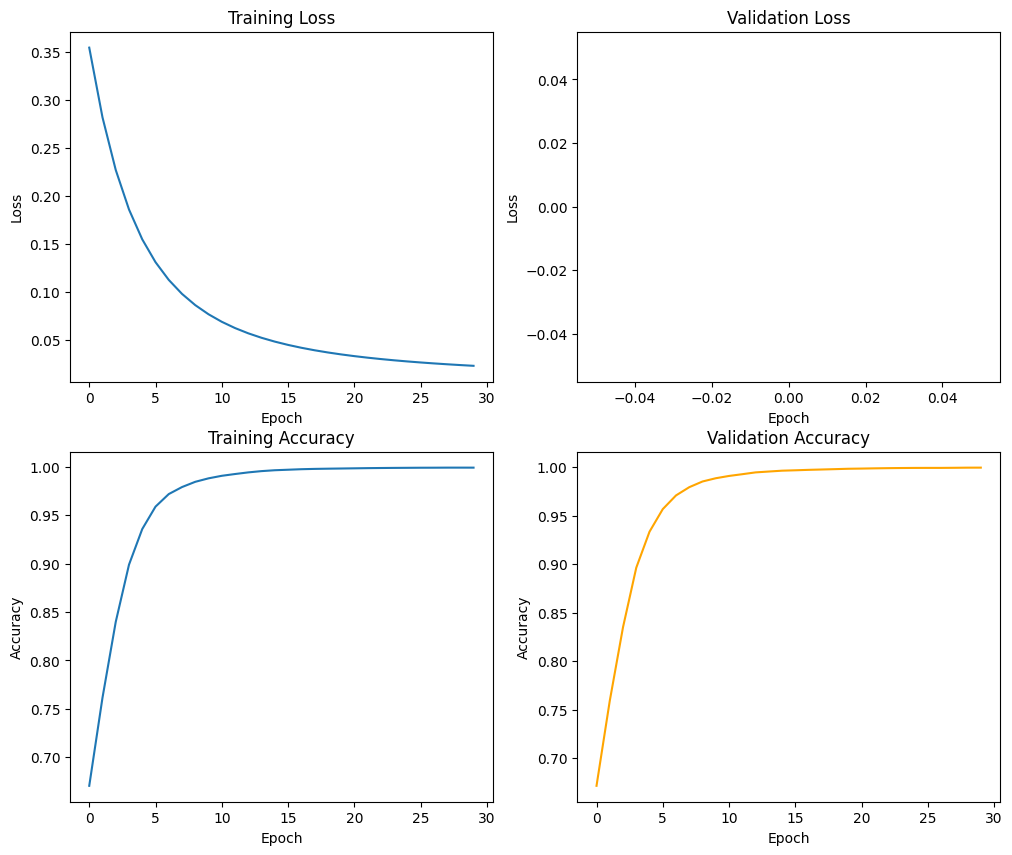

In [ ]:
fig,ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title ('Validation Accuracy')

plt.show()

## Đánh giá mô hình:
Sử dụng bộ trọng số mô hình tìm được sau quá trình huấn luyện, ta đánh giá độ chính xác của mô hình trên hai tập val và test:

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set :')
print(f'Accuracy : {val_set_acc }')
print(f'Accuracy : {test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.9995045268231161
Accuracy : 0.9986487703810467
